In [8]:
from utils import *

csv_list = [
	'CHANGAN.csv',
	'CHERY.csv',
	'CHEVROLET.csv',
	'CITROEN.csv',
	'FIAT.csv',
	'FORD.csv',
	'GREAT WALL.csv',
	'HAVAL.csv',
	'HONDA.csv',
	'HYUNDAI.csv',
	'JAC.csv',
	'JEEP.csv',
	'JMC.csv',
	'KIA.csv',
	'MAXUS.csv',
	'MAZDA.csv',
	'MG.csv',
	'MITSUBISHI.csv',
	'NISSAN.csv',
	'PEUGEOT.csv',
	'RAM.csv',
	'RENAULT.csv',
	'SSANGYONG.csv',
	'SUBARU.csv',
	'SUZUKI.csv',
	'TOYOTA.csv',
	'VOLKSWAGEN.csv'
]

df = pd.DataFrame()

for csv in csv_list:
	df_csv = pd.read_csv(f'data/{csv}')
	df = pd.concat([df, df_csv], ignore_index=True)

print(df.shape)
print(df['link'].nunique())

df.info()

(27731, 13)
7709
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27731 entries, 0 to 27730
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          27731 non-null  object 
 1   descr          27731 non-null  object 
 2   price          27731 non-null  float64
 3   year           27731 non-null  object 
 4   km             27731 non-null  float64
 5   transmission   27731 non-null  object 
 6   location       27731 non-null  object 
 7   date_posted    27731 non-null  object 
 8   link           27731 non-null  object 
 9   date_imported  27731 non-null  object 
 10  Marca          27731 non-null  object 
 11  Tipo           27731 non-null  object 
 12  Modelo         27731 non-null  object 
dtypes: float64(2), object(11)
memory usage: 2.8+ MB


In [9]:
df = df.drop_duplicates(subset=['link', 'title', 'price']).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          7713 non-null   object 
 1   descr          7713 non-null   object 
 2   price          7713 non-null   float64
 3   year           7713 non-null   object 
 4   km             7713 non-null   float64
 5   transmission   7713 non-null   object 
 6   location       7713 non-null   object 
 7   date_posted    7713 non-null   object 
 8   link           7713 non-null   object 
 9   date_imported  7713 non-null   object 
 10  Marca          7713 non-null   object 
 11  Tipo           7713 non-null   object 
 12  Modelo         7713 non-null   object 
dtypes: float64(2), object(11)
memory usage: 783.5+ KB


In [19]:
lista = df['title'].tolist()

batch_size = 4

for batch_start in range(7705, len(lista), batch_size):
	
	batch = lista[batch_start:batch_start + batch_size]

	dict_marca = {}

	format = {"Marca": "Kia", "Modelo": "Cerato"}

	prompt = f"""
	Te proporcionaré una lista de títulos de publicaciones de venta de vehículos usados.
	Tu tarea es identificar TODAS las Marcas y el Modelo para CADA publicación.

	Ejemplo:
	Título de la publicación: "Changan cx70 2019"
	Respuesta esperada: Marca: Changan, Modelo: cx70
	Título de la publicación: "Kia Cerato en buen estado"
	Respuesta esperada: Marca: Kia, Modelo: Cerato

	Asegúrate de seguir estas pautas:
	1. Debes identificar la Marca y el Modelo en cada publicación.
	4. Debes priorizar siempre el formato, evitar la inconsistencia en la escritura.
	5. Debes la marca y el modelo para CADA UNA de las {batch_size} publicaciones.
	6. Debes entregar una lista de {batch_size} elementos, sin resumir.
	6. Debes conservar el orden de las publicaciones.
	7. No incluyas características especiales del modelo como por ejemplo: LS, GLX, 1.8, 1.6, 2.0, AC, MT, AT, etc. Solamente incluye la marca y el keyword del modelo.
	
	Importante:
	NO RESUMAS LA LISTA DE PUBLICACIONES, NO USES TRIPLES PUNTOS (...) PARA INDICAR QUE HAY MÁS TEXTO. NI OMITAS NINGUNA DE LAS PUBLICACIONES
	DAME LA VERSIÓN COMPLETA DEL OUTPUT, SIN RESUMIR.

	Por favor, proporciona la respuesta en un arreglo de JSON en el siguiente formato:

	[{format}]

	Si no puedes identificar la Marca y el Modelo en una publicación, déjalos en blanco.

	A continuación, te presento la lista de títulos de publicaciones:
	```
	{batch}
	```
	Recuerda generar un match para cada publicación, sin resumir, sin triples puntos (...), sin omitir publicaciones.
	"""
	
	result = get_completion(prompt, temperature=0.8, model='gpt-3.5-turbo-16k-0613')
	
	result = eval(result['message'])


	for i, x in enumerate(result):
		try:
			dict_marca[batch[i]] = x
		except:
			dict_marca[batch[i]] = {'Marca': '', 'Modelo': ''}

	df_marca = pd.DataFrame.from_dict(dict_marca, orient='index')

	df_marca.to_csv(f'data_val/batch_{batch_start}.csv')

In [26]:
# consolidar
df_matches = pd.DataFrame()

csv_list = [
	'batch_0.csv',
	'batch_100.csv',
	'batch_1000.csv',
	'batch_1050.csv',
	'batch_1100.csv',
	'batch_1150.csv',
	'batch_1200.csv',
	'batch_1250.csv',
	'batch_1300.csv',
	'batch_1350.csv',
	'batch_1400.csv',
	'batch_1450.csv',
	'batch_150.csv',
	'batch_1500.csv',
	'batch_1550.csv',
	'batch_1600.csv',
	'batch_1650.csv',
	'batch_1700.csv',
	'batch_1750.csv',
	'batch_1800.csv',
	'batch_1850.csv',
	'batch_1900.csv',
	'batch_1950.csv',
	'batch_200.csv',
	'batch_2000.csv',
	'batch_2050.csv',
	'batch_2100.csv',
	'batch_2150.csv',
	'batch_2200.csv',
	'batch_2250.csv',
	'batch_2300.csv',
	'batch_2310.csv',
	'batch_2320.csv',
	'batch_2330.csv',
	'batch_2340.csv',
	'batch_2350.csv',
	'batch_2360.csv',
	'batch_2370.csv',
	'batch_2380.csv',
	'batch_2390.csv',
	'batch_2400.csv',
	'batch_2410.csv',
	'batch_2420.csv',
	'batch_2430.csv',
	'batch_2440.csv',
	'batch_2450.csv',
	'batch_2460.csv',
	'batch_2470.csv',
	'batch_2480.csv',
	'batch_2490.csv',
	'batch_250.csv',
	'batch_2500.csv',
	'batch_2510.csv',
	'batch_2520.csv',
	'batch_2530.csv',
	'batch_2540.csv',
	'batch_2550.csv',
	'batch_2560.csv',
	'batch_2570.csv',
	'batch_2580.csv',
	'batch_2590.csv',
	'batch_2600.csv',
	'batch_2610.csv',
	'batch_2620.csv',
	'batch_2630.csv',
	'batch_2640.csv',
	'batch_2650.csv',
	'batch_2660.csv',
	'batch_2670.csv',
	'batch_2680.csv',
	'batch_2690.csv',
	'batch_2700.csv',
	'batch_2710.csv',
	'batch_2720.csv',
	'batch_2730.csv',
	'batch_2740.csv',
	'batch_2750.csv',
	'batch_2760.csv',
	'batch_2770.csv',
	'batch_2780.csv',
	'batch_2790.csv',
	'batch_2800.csv',
	'batch_2810.csv',
	'batch_2820.csv',
	'batch_2830.csv',
	'batch_2840.csv',
	'batch_2850.csv',
	'batch_2860.csv',
	'batch_2870.csv',
	'batch_2880.csv',
	'batch_2890.csv',
	'batch_2900.csv',
	'batch_2910.csv',
	'batch_2920.csv',
	'batch_2930.csv',
	'batch_2940.csv',
	'batch_2950.csv',
	'batch_2960.csv',
	'batch_2970.csv',
	'batch_2980.csv',
	'batch_2990.csv',
	'batch_300.csv',
	'batch_3000.csv',
	'batch_3010.csv',
	'batch_3020.csv',
	'batch_3030.csv',
	'batch_3040.csv',
	'batch_3050.csv',
	'batch_3060.csv',
	'batch_3070.csv',
	'batch_3080.csv',
	'batch_3090.csv',
	'batch_3100.csv',
	'batch_3110.csv',
	'batch_3120.csv',
	'batch_3130.csv',
	'batch_3140.csv',
	'batch_3150.csv',
	'batch_3160.csv',
	'batch_3170.csv',
	'batch_3180.csv',
	'batch_3190.csv',
	'batch_3200.csv',
	'batch_3210.csv',
	'batch_3220.csv',
	'batch_3230.csv',
	'batch_3240.csv',
	'batch_3250.csv',
	'batch_3260.csv',
	'batch_3270.csv',
	'batch_3280.csv',
	'batch_3290.csv',
	'batch_3300.csv',
	'batch_3310.csv',
	'batch_3320.csv',
	'batch_3330.csv',
	'batch_3340.csv',
	'batch_3350.csv',
	'batch_3360.csv',
	'batch_3370.csv',
	'batch_3380.csv',
	'batch_3390.csv',
	'batch_3400.csv',
	'batch_3410.csv',
	'batch_3420.csv',
	'batch_3430.csv',
	'batch_3440.csv',
	'batch_3450.csv',
	'batch_3460.csv',
	'batch_3470.csv',
	'batch_3480.csv',
	'batch_3490.csv',
	'batch_350.csv',
	'batch_3500.csv',
	'batch_3510.csv',
	'batch_3520.csv',
	'batch_3530.csv',
	'batch_3540.csv',
	'batch_3550.csv',
	'batch_3560.csv',
	'batch_3570.csv',
	'batch_3580.csv',
	'batch_3590.csv',
	'batch_3600.csv',
	'batch_3610.csv',
	'batch_3620.csv',
	'batch_3630.csv',
	'batch_3640.csv',
	'batch_3650.csv',
	'batch_3660.csv',
	'batch_3670.csv',
	'batch_3680.csv',
	'batch_3690.csv',
	'batch_3700.csv',
	'batch_3710.csv',
	'batch_3720.csv',
	'batch_3730.csv',
	'batch_3740.csv',
	'batch_3750.csv',
	'batch_3760.csv',
	'batch_3770.csv',
	'batch_3780.csv',
	'batch_3790.csv',
	'batch_3800.csv',
	'batch_3810.csv',
	'batch_3820.csv',
	'batch_3830.csv',
	'batch_3840.csv',
	'batch_3850.csv',
	'batch_3860.csv',
	'batch_3870.csv',
	'batch_3880.csv',
	'batch_3890.csv',
	'batch_3900.csv',
	'batch_3910.csv',
	'batch_3920.csv',
	'batch_3930.csv',
	'batch_3940.csv',
	'batch_3950.csv',
	'batch_3960.csv',
	'batch_3970.csv',
	'batch_3980.csv',
	'batch_3990.csv',
	'batch_400.csv',
	'batch_4000.csv',
	'batch_4010.csv',
	'batch_4020.csv',
	'batch_4030.csv',
	'batch_4040.csv',
	'batch_4050.csv',
	'batch_4060.csv',
	'batch_4070.csv',
	'batch_4080.csv',
	'batch_4090.csv',
	'batch_4100.csv',
	'batch_4110.csv',
	'batch_4120.csv',
	'batch_4130.csv',
	'batch_4140.csv',
	'batch_4150.csv',
	'batch_4160.csv',
	'batch_4170.csv',
	'batch_4180.csv',
	'batch_4190.csv',
	'batch_4200.csv',
	'batch_4210.csv',
	'batch_4220.csv',
	'batch_4230.csv',
	'batch_4240.csv',
	'batch_4250.csv',
	'batch_4260.csv',
	'batch_4270.csv',
	'batch_4280.csv',
	'batch_4290.csv',
	'batch_4300.csv',
	'batch_4310.csv',
	'batch_4320.csv',
	'batch_4330.csv',
	'batch_4340.csv',
	'batch_4350.csv',
	'batch_4360.csv',
	'batch_4370.csv',
	'batch_4380.csv',
	'batch_4390.csv',
	'batch_4400.csv',
	'batch_4410.csv',
	'batch_4420.csv',
	'batch_4430.csv',
	'batch_4440.csv',
	'batch_4450.csv',
	'batch_4460.csv',
	'batch_4470.csv',
	'batch_4480.csv',
	'batch_4490.csv',
	'batch_450.csv',
	'batch_4500.csv',
	'batch_4510.csv',
	'batch_4520.csv',
	'batch_4530.csv',
	'batch_4540.csv',
	'batch_4550.csv',
	'batch_4560.csv',
	'batch_4570.csv',
	'batch_4580.csv',
	'batch_4590.csv',
	'batch_4600.csv',
	'batch_4610.csv',
	'batch_4620.csv',
	'batch_4630.csv',
	'batch_4640.csv',
	'batch_4650.csv',
	'batch_4660.csv',
	'batch_4670.csv',
	'batch_4680.csv',
	'batch_4690.csv',
	'batch_4700.csv',
	'batch_4710.csv',
	'batch_4720.csv',
	'batch_4730.csv',
	'batch_4740.csv',
	'batch_4750.csv',
	'batch_4760.csv',
	'batch_4770.csv',
	'batch_4780.csv',
	'batch_4790.csv',
	'batch_4800.csv',
	'batch_4810.csv',
	'batch_4820.csv',
	'batch_4830.csv',
	'batch_4840.csv',
	'batch_4850.csv',
	'batch_4860.csv',
	'batch_4870.csv',
	'batch_4880.csv',
	'batch_4890.csv',
	'batch_4900.csv',
	'batch_4910.csv',
	'batch_4920.csv',
	'batch_4930.csv',
	'batch_4940.csv',
	'batch_4950.csv',
	'batch_4960.csv',
	'batch_4970.csv',
	'batch_4980.csv',
	'batch_4990.csv',
	'batch_50.csv',
	'batch_500.csv',
	'batch_5000.csv',
	'batch_5010.csv',
	'batch_5020.csv',
	'batch_5030.csv',
	'batch_5040.csv',
	'batch_5050.csv',
	'batch_5060.csv',
	'batch_5065.csv',
	'batch_5070.csv',
	'batch_5075.csv',
	'batch_5080.csv',
	'batch_5085.csv',
	'batch_5090.csv',
	'batch_5095.csv',
	'batch_5100.csv',
	'batch_5105.csv',
	'batch_5110.csv',
	'batch_5115.csv',
	'batch_5128.csv',
	'batch_5141.csv',
	'batch_5154.csv',
	'batch_5167.csv',
	'batch_5180.csv',
	'batch_5193.csv',
	'batch_5203.csv',
	'batch_5213.csv',
	'batch_5223.csv',
	'batch_5233.csv',
	'batch_5243.csv',
	'batch_5253.csv',
	'batch_5263.csv',
	'batch_5273.csv',
	'batch_5283.csv',
	'batch_5293.csv',
	'batch_5303.csv',
	'batch_5313.csv',
	'batch_5323.csv',
	'batch_5333.csv',
	'batch_5343.csv',
	'batch_5353.csv',
	'batch_5363.csv',
	'batch_5373.csv',
	'batch_5383.csv',
	'batch_5393.csv',
	'batch_5403.csv',
	'batch_5413.csv',
	'batch_5423.csv',
	'batch_5433.csv',
	'batch_5443.csv',
	'batch_5453.csv',
	'batch_5463.csv',
	'batch_5473.csv',
	'batch_5483.csv',
	'batch_5493.csv',
	'batch_550.csv',
	'batch_5503.csv',
	'batch_5513.csv',
	'batch_5523.csv',
	'batch_5533.csv',
	'batch_5543.csv',
	'batch_5553.csv',
	'batch_5563.csv',
	'batch_5573.csv',
	'batch_5583.csv',
	'batch_5593.csv',
	'batch_5603.csv',
	'batch_5613.csv',
	'batch_5623.csv',
	'batch_5633.csv',
	'batch_5643.csv',
	'batch_5653.csv',
	'batch_5663.csv',
	'batch_5673.csv',
	'batch_5683.csv',
	'batch_5693.csv',
	'batch_5703.csv',
	'batch_5713.csv',
	'batch_5723.csv',
	'batch_5733.csv',
	'batch_5743.csv',
	'batch_5753.csv',
	'batch_5763.csv',
	'batch_5773.csv',
	'batch_5783.csv',
	'batch_5793.csv',
	'batch_5803.csv',
	'batch_5813.csv',
	'batch_5823.csv',
	'batch_5833.csv',
	'batch_5843.csv',
	'batch_5853.csv',
	'batch_5863.csv',
	'batch_5873.csv',
	'batch_5883.csv',
	'batch_5893.csv',
	'batch_5903.csv',
	'batch_5913.csv',
	'batch_5923.csv',
	'batch_5933.csv',
	'batch_5943.csv',
	'batch_5953.csv',
	'batch_5963.csv',
	'batch_5973.csv',
	'batch_5983.csv',
	'batch_5993.csv',
	'batch_600.csv',
	'batch_6003.csv',
	'batch_6013.csv',
	'batch_6023.csv',
	'batch_6033.csv',
	'batch_6043.csv',
	'batch_6053.csv',
	'batch_6063.csv',
	'batch_6073.csv',
	'batch_6083.csv',
	'batch_6093.csv',
	'batch_6103.csv',
	'batch_6113.csv',
	'batch_6123.csv',
	'batch_6133.csv',
	'batch_6143.csv',
	'batch_6153.csv',
	'batch_6163.csv',
	'batch_6173.csv',
	'batch_6183.csv',
	'batch_6193.csv',
	'batch_6203.csv',
	'batch_6213.csv',
	'batch_6223.csv',
	'batch_6233.csv',
	'batch_6243.csv',
	'batch_6253.csv',
	'batch_6263.csv',
	'batch_6273.csv',
	'batch_6283.csv',
	'batch_6293.csv',
	'batch_6303.csv',
	'batch_6313.csv',
	'batch_6323.csv',
	'batch_6333.csv',
	'batch_6343.csv',
	'batch_6353.csv',
	'batch_6363.csv',
	'batch_6373.csv',
	'batch_6383.csv',
	'batch_6393.csv',
	'batch_6403.csv',
	'batch_6413.csv',
	'batch_6423.csv',
	'batch_6433.csv',
	'batch_6443.csv',
	'batch_6453.csv',
	'batch_6461.csv',
	'batch_6469.csv',
	'batch_6477.csv',
	'batch_6485.csv',
	'batch_6493.csv',
	'batch_650.csv',
	'batch_6501.csv',
	'batch_6509.csv',
	'batch_6517.csv',
	'batch_6525.csv',
	'batch_6533.csv',
	'batch_6541.csv',
	'batch_6549.csv',
	'batch_6557.csv',
	'batch_6565.csv',
	'batch_6573.csv',
	'batch_6581.csv',
	'batch_6589.csv',
	'batch_6597.csv',
	'batch_6605.csv',
	'batch_6613.csv',
	'batch_6621.csv',
	'batch_6629.csv',
	'batch_6637.csv',
	'batch_6645.csv',
	'batch_6653.csv',
	'batch_6661.csv',
	'batch_6669.csv',
	'batch_6677.csv',
	'batch_6685.csv',
	'batch_6693.csv',
	'batch_6701.csv',
	'batch_6709.csv',
	'batch_6717.csv',
	'batch_6725.csv',
	'batch_6733.csv',
	'batch_6741.csv',
	'batch_6749.csv',
	'batch_6757.csv',
	'batch_6765.csv',
	'batch_6773.csv',
	'batch_6781.csv',
	'batch_6789.csv',
	'batch_6797.csv',
	'batch_6805.csv',
	'batch_6813.csv',
	'batch_6821.csv',
	'batch_6829.csv',
	'batch_6837.csv',
	'batch_6845.csv',
	'batch_6853.csv',
	'batch_6861.csv',
	'batch_6869.csv',
	'batch_6877.csv',
	'batch_6885.csv',
	'batch_6893.csv',
	'batch_6901.csv',
	'batch_6909.csv',
	'batch_6917.csv',
	'batch_6925.csv',
	'batch_6933.csv',
	'batch_6941.csv',
	'batch_6949.csv',
	'batch_6957.csv',
	'batch_6965.csv',
	'batch_6973.csv',
	'batch_6981.csv',
	'batch_6989.csv',
	'batch_6997.csv',
	'batch_700.csv',
	'batch_7005.csv',
	'batch_7013.csv',
	'batch_7021.csv',
	'batch_7029.csv',
	'batch_7037.csv',
	'batch_7045.csv',
	'batch_7053.csv',
	'batch_7061.csv',
	'batch_7069.csv',
	'batch_7077.csv',
	'batch_7085.csv',
	'batch_7093.csv',
	'batch_7101.csv',
	'batch_7109.csv',
	'batch_7117.csv',
	'batch_7125.csv',
	'batch_7133.csv',
	'batch_7141.csv',
	'batch_7149.csv',
	'batch_7157.csv',
	'batch_7165.csv',
	'batch_7173.csv',
	'batch_7181.csv',
	'batch_7189.csv',
	'batch_7197.csv',
	'batch_7205.csv',
	'batch_7213.csv',
	'batch_7221.csv',
	'batch_7229.csv',
	'batch_7237.csv',
	'batch_7245.csv',
	'batch_7253.csv',
	'batch_7261.csv',
	'batch_7269.csv',
	'batch_7277.csv',
	'batch_7285.csv',
	'batch_7293.csv',
	'batch_7301.csv',
	'batch_7309.csv',
	'batch_7317.csv',
	'batch_7325.csv',
	'batch_7333.csv',
	'batch_7341.csv',
	'batch_7349.csv',
	'batch_7357.csv',
	'batch_7365.csv',
	'batch_7373.csv',
	'batch_7381.csv',
	'batch_7389.csv',
	'batch_7397.csv',
	'batch_7405.csv',
	'batch_7413.csv',
	'batch_7421.csv',
	'batch_7429.csv',
	'batch_7437.csv',
	'batch_7445.csv',
	'batch_7453.csv',
	'batch_7461.csv',
	'batch_7469.csv',
	'batch_7477.csv',
	'batch_7485.csv',
	'batch_7490.csv',
	'batch_7495.csv',
	'batch_750.csv',
	'batch_7500.csv',
	'batch_7505.csv',
	'batch_7510.csv',
	'batch_7515.csv',
	'batch_7520.csv',
	'batch_7525.csv',
	'batch_7530.csv',
	'batch_7535.csv',
	'batch_7540.csv',
	'batch_7545.csv',
	'batch_7550.csv',
	'batch_7555.csv',
	'batch_7560.csv',
	'batch_7565.csv',
	'batch_7570.csv',
	'batch_7575.csv',
	'batch_7580.csv',
	'batch_7585.csv',
	'batch_7590.csv',
	'batch_7595.csv',
	'batch_7600.csv',
	'batch_7605.csv',
	'batch_7610.csv',
	'batch_7615.csv',
	'batch_7620.csv',
	'batch_7625.csv',
	'batch_7630.csv',
	'batch_7635.csv',
	'batch_7640.csv',
	'batch_7645.csv',
	'batch_7650.csv',
	'batch_7655.csv',
	'batch_7660.csv',
	'batch_7665.csv',
	'batch_7670.csv',
	'batch_7675.csv',
	'batch_7680.csv',
	'batch_7685.csv',
	'batch_7690.csv',
	'batch_7695.csv',
	'batch_7700.csv',
	'batch_7705.csv',
	'batch_7709.csv',
	'batch_800.csv',
	'batch_850.csv',
	'batch_900.csv',
	'batch_950.csv',
]

for csv in csv_list:
	df_csv = pd.read_csv(f'data_val/{csv}')
	df_matches = pd.concat([df_matches, df_csv], ignore_index=True)

df_matches.rename(columns={'Unnamed: 0': 'title'}, inplace=True)
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7467 entries, 0 to 7466
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     7467 non-null   object
 1   Marca     7401 non-null   object
 2   Modelo    7290 non-null   object
 3   ...Marca  1 non-null      object
dtypes: object(4)
memory usage: 233.5+ KB


In [27]:
# cruce
df_merged = pd.merge(df, df_matches, on='title', how='left')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14477 entries, 0 to 14476
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          14477 non-null  object 
 1   descr          14477 non-null  object 
 2   price          14477 non-null  float64
 3   year           14477 non-null  object 
 4   km             14477 non-null  float64
 5   transmission   14477 non-null  object 
 6   location       14477 non-null  object 
 7   date_posted    14477 non-null  object 
 8   link           14477 non-null  object 
 9   date_imported  14477 non-null  object 
 10  Marca_x        14477 non-null  object 
 11  Tipo           14477 non-null  object 
 12  Modelo_x       14477 non-null  object 
 13  Marca_y        14386 non-null  object 
 14  Modelo_y       14254 non-null  object 
 15  ...Marca       2 non-null      object 
dtypes: float64(2), object(14)
memory usage: 1.9+ MB


In [29]:
df_merged = df_merged.drop(columns=['...Marca'])

In [33]:
df_merged[(df_merged['Marca_y'].isna()) & (df_merged['Marca_x'].notna())]

,title,descr,price,year,km,transmission,location,date_posted,link,date_imported,Marca_x,Tipo,Modelo_x,Marca_y,Modelo_y
1025,Tiggo 2 2019 Liberado,"Vendo tiggo2 2019 documentos al día, Liberado...",8500000.0,2019,60000.0,Manual,"Punta Arenas, XII Magallanes & Antártica",29 sep 2023 a las 16:57,https://www.yapo.cl/vehiculos/tiggo-2-2019-lib...,2023-10-04 13:49:27.198533,CHERY,SUV,TIGGO 2,NaN,Tiggo 2
1351,Por renovación TiGGO 2 único dueño,Se vende TiGGo 2 único dueño con mantenimiento...,7500000.0,2018,70000.0,Manual,"Viña del Mar, V Valparaíso",23 sep 2023 a las 16:34,https://www.yapo.cl/vehiculos/por-renovacion-t...,2023-10-04 13:55:57.699397,CHERY,SUV,TIGGO 7,NaN,NaN
1816,Aveo sedan 2006 1.4,"Se vende Chevrolet Aveo 1.4 está al día, tranf...",2800000.0,2011,160000.0,Manual,"Lo Prado, Región Metropolitana",30 sep 2023 a las 16:08,https://www.yapo.cl/vehiculos/aveo-sedan-2006-...,2023-10-04 08:57:15.290270,CHEVROLET,Sedán,AVEO,NaN,Aveo sedan
2458,C5 2.0 Diesel AT,"Vendo Citroen C5, año 2021, 82.500 km,motor 2....",19300000.0,2021,82500.0,Automático,"Temuco, IX Araucanía",20 sep 2023 a las 23:21,https://www.yapo.cl/vehiculos/c5-20-diesel-at_...,2023-10-04 10:45:24.877628,CITROEN,SUV,C5 AIRCROSS,NaN,C5
2477,Spark gt 2019 sin a/c,Se vende spark gt 2019 papeles al día hasta el...,5500000.0,2019,124000.0,Manual,"Buin, Región Metropolitana",29 sep 2023 a las 18:53,https://www.yapo.cl/vehiculos/spark-gt-2019-si...,2023-10-04 10:47:27.772206,CITROEN,Sedán,C-ELYSáE,NaN,Spark gt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14146,Camioneta Amarok V6,"Camioneta Amarok V6 en perfectas condiciones, ...",35000000.0,2021,130000.0,Automático,"La Unión, XIV Los Ríos",24 sep 2023 a las 22:24,https://www.yapo.cl/vehiculos/camioneta-amarok...,2023-10-04 03:34:31.385119,VOLKSWAGEN,Pick-up,AMAROK,NaN,NaN
14180,Exelente Volkswagen gol highline full,Exelente Volkswagen gol highline full impecabl...,7800000.0,2021,51000.0,Manual,"Macul, Región Metropolitana",24 sep 2023 a las 08:32,https://www.yapo.cl/vehiculos/exelente-volkswa...,2023-10-04 03:34:31.557807,VOLKSWAGEN,Pick-up,AMAROK,NaN,NaN
14290,VOLKSWAGEN,"Único dueño, papeles al día",10000000.0,2022,63300.0,Manual,"Puerto Varas, X Los Lagos",21 sep 2023 a las 21:15,https://www.yapo.cl/vehiculos/volkswagen_88207819,2023-10-04 03:35:18.761927,VOLKSWAGEN,Pick-up,AMAROK,NaN,NaN
14394,volwagen gol 2021,Volwagen gol 2021 modelo hiline 16244 km... Tr...,7200000.0,2021,16244.0,Manual,"Rancagua, VI O'Higgins",22 sep 2023 a las 16:14,https://www.yapo.cl/vehiculos/volwagen-gol-202...,2023-10-04 03:43:04.425143,VOLKSWAGEN,Hatchback,GOL,NaN,NaN


In [34]:
# update y with x
df_merged['Marca_y'] = df_merged['Marca_y'].fillna(df_merged['Marca_x'])

In [35]:
df_merged[(df_merged['Modelo_y'].isna()) & (df_merged['Modelo_x'].notna())]

,title,descr,price,year,km,transmission,location,date_posted,link,date_imported,Marca_x,Tipo,Modelo_x,Marca_y,Modelo_y
0,Changan,Changan Alsvin\nAño 2021\nKilometraje 22000 ap...,7400000.0,2021,22000.0,Manual,"La Florida, Región Metropolitana",Ayer a las 20:25,https://www.yapo.cl/vehiculos/changan_88306066,2023-10-04 03:12:46.087788,CHANGAN,SUV,ALSVIN,Changan,NaN
1,Changan,Changan Alsvin\nAño 2021\nKilometraje 22000 ap...,7400000.0,2021,22000.0,Manual,"La Florida, Región Metropolitana",Ayer a las 20:25,https://www.yapo.cl/vehiculos/changan_88306066,2023-10-04 03:12:46.087788,CHANGAN,SUV,ALSVIN,Changan,NaN
38,Changan 2021 seminueva,Camioneta seminueva con carroceria de fierro c...,10500000.0,2021,8900.0,Manual,"Puente Alto, Región Metropolitana",02 oct 2023 a las 15:12,https://www.yapo.cl/vehiculos/changan-2021-sem...,2023-10-04 03:12:46.103426,CHANGAN,SUV,ALSVIN,Changan,NaN
75,Changan changan 2022,Este CHANGAN CHANGAN 2022 esta garantizado por...,19490000.0,2022,8391.0,Automático,"Huechuraba, Región Metropolitana",01 oct 2023 a las 10:39,https://www.yapo.cl/vehiculos/changan-changan-...,2023-10-04 03:12:46.134683,CHANGAN,SUV,ALSVIN,Changan,NaN
212,CHANGAN,Por renovación se vende excelente vehículo fam...,10000000.0,2019,58000.0,Automático,"Rancagua, VI O'Higgins",26 sep 2023 a las 18:18,https://www.yapo.cl/vehiculos/changan_88255428,2023-10-04 03:14:17.925942,CHANGAN,SUV,ALSVIN,CHANGAN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14290,VOLKSWAGEN,"Único dueño, papeles al día",10000000.0,2022,63300.0,Manual,"Puerto Varas, X Los Lagos",21 sep 2023 a las 21:15,https://www.yapo.cl/vehiculos/volkswagen_88207819,2023-10-04 03:35:18.761927,VOLKSWAGEN,Pick-up,AMAROK,VOLKSWAGEN,NaN
14394,volwagen gol 2021,Volwagen gol 2021 modelo hiline 16244 km... Tr...,7200000.0,2021,16244.0,Manual,"Rancagua, VI O'Higgins",22 sep 2023 a las 16:14,https://www.yapo.cl/vehiculos/volwagen-gol-202...,2023-10-04 03:43:04.425143,VOLKSWAGEN,Hatchback,GOL,VOLKSWAGEN,NaN
14406,Volkswagen,"Volkswagen, trendline, 1.6 Excelente estado",4700000.0,2010,111350.0,Manual,"Pudahuel, Región Metropolitana",21 sep 2023 a las 08:38,https://www.yapo.cl/vehiculos/volkswagen_88195460,2023-10-04 03:50:59.977493,VOLKSWAGEN,SUV,NIVUS,Volkswagen,NaN
14407,Volkswagen,"Volkswagen, trendline, 1.6 Excelente estado",4700000.0,2010,111350.0,Manual,"Pudahuel, Región Metropolitana",21 sep 2023 a las 08:38,https://www.yapo.cl/vehiculos/volkswagen_88195460,2023-10-04 03:50:59.977493,VOLKSWAGEN,SUV,NIVUS,Volkswagen,NaN


In [36]:
# update y with x
df_merged['Modelo_y'] = df_merged['Modelo_y'].fillna(df_merged['Modelo_x'])

In [42]:

df_merged['Marca_y'] = df_merged['Marca_y'].str.upper()
df_merged['Marca_y'].unique()

array(['CHANGAN', 'ZOTYE', 'JEEP', 'CHAGAN', 'CHERY', 'MAZDA', 'SUBARU',
       'SSANGYONG', 'NISSAN', 'TOYOTA', 'VOLKSWAGEN', 'CHEVROLET',
       'MERCEDES-BENZ', 'PEUGEOT', 'AUDI', 'KIA', 'RENAULT', 'GREAT WALL',
       'MG', 'FORD', 'JMC', 'SUZUKI', 'WINGLE', 'CITROEN', 'CITROËN',
       'MITSUBISHI', 'MAHINDRA', 'HYUNDAI', 'MERCEDES BENZ', 'FIAT',
       'GRAT WALL', 'GREET WALL', 'GRETA WALL', 'HAVAL', 'GW HAVAL',
       'GREAT WALL HAVAL', 'HONDA', 'HYUNDAY', 'HYNDAI', 'BMW', 'BYD',
       'JAC', 'VOLVO', 'VIGUS', 'DODGE', 'MAXUS', 'INFINITI', 'DFSK',
       'RAM', 'TIAGO', 'MAZDASPEED', 'DONGFENG', 'OCASIÓN MG', 'HAIMA',
       'OPEL', 'BRILLIANCE', 'SSANGYYONG', 'SAMSUNG', 'CAMIONETA BELLA',
       'MI', 'AUTO SEDAN MG', 'LAND ROVER', 'DODGE RAM', 'DOGDE',
       'RAM VAM', 'FURGON DODGE RAM VAN', 'MINI', 'MASERATI', 'PORSCHE',
       'SUSUKI', 'VW', 'WOLKSWAGEN', 'GOL', 'VOLSWAGEN', 'GAC MOTOR',
       'GEELY'], dtype=object)

In [46]:
replacer = {
	'HYNDAI': 'HYUNDAI',
	'HYUNDAY': 'HYUNDAI',
	'GRETA WALL': 'GREAT WALL',
	'GRAT WALL': 'GREAT WALL',
	'GREET WALL': 'GREAT WALL',
	'GW HAVAL': 'GREAT WALL',
	'GREAT WALL HAVAL': 'GREAT WALL',
	'CHAGAN': 'CHANGAN',
	'VW': 'VOLKSWAGEN',
	'WOLKSWAGEN': 'VOLKSWAGEN',
	'VOLSWAGEN': 'VOLKSWAGEN',
	'SSANGYYONG': 'SSANGYONG',
	'OCASIÓN MG': 'MG',
	'CAMIONETA BELLA': 'MG',
	'AUTO SEDAN MG': 'MG',
	'RAM VAM': 'RAM',
	'FURGON DODGE RAM VAN': 'RAM',
	'GOL': 'VOLKSWAGEN',
	'GAC MOTOR': 'GAC',
	'CITROËN': 'CITROEN',
	'SUSUKI': 'SUZUKI',
}

df_merged['Marca_y'] = df_merged['Marca_y'].replace(replacer)

df_merged['Marca_y'].value_counts()

VOLKSWAGEN       1648
PEUGEOT          1247
MG               1244
CHANGAN           857
HYUNDAI           788
MAZDA             740
FIAT              713
CHEVROLET         698
RAM               606
CITROEN           427
TOYOTA            409
MAXUS             406
CHERY             380
SUZUKI            368
KIA               345
MITSUBISHI        341
HAVAL             337
NISSAN            335
GREAT WALL        328
RENAULT           293
DODGE             268
JEEP              265
SSANGYONG         256
JAC               249
JMC               218
FORD              216
SUBARU            212
HONDA             188
BMW                19
ZOTYE              13
MERCEDES-BENZ      10
AUDI                8
VOLVO               8
MAHINDRA            5
OPEL                4
INFINITI            3
MERCEDES BENZ       3
MINI                2
DOGDE               2
DODGE RAM           2
SAMSUNG             1
MASERATI            1
PORSCHE             1
LAND ROVER          1
GAC                 1
MI        

In [59]:
df_merged['Modelo_y'] = df_merged['Modelo_y'].str.upper()

str_to_delete = [
	'2.0',
	'2.8',
	'1.6',
	'1.8',
	'1.4',
	'1.5',
	'1.3',
	'AWD',
	'PREMIER',
	'TURBO',
	'AT',
	'MT',
	'4X4',
	'2010',
	'2011',
	'2012',
	'2013',
	'2014',
	'2015',
	'2016',
	'2017',
	'2018',
	'2019',
	'2020',
	'2021',
	'2022',
	'2023',
	'2024',
	'AÑO',
	'FULL EQUIPO',
	'FULL',
	'4X2',
	'SPORT',
	'ELITE',
	'PREMIUM',
	'AUTOMÁTICA',
	'AUTOMATICO',
	'MANUAL',
	'MECANICO',
	'VERSIÓN',
	'PLUS',
	'CONFORT',
	'TOP DE LINEA',
	'LUXURY',
	'COMFORT',
	'LUXURI',
	'1.9T',
	'DIESEL',
	'SUV',
	'CONECT',
	'PICK UP',
	'LUJO',
	'AUTOMICO',
	'NEW',
	'HCHBACK',
	'HB',
	'GLX',
	'RX',
]

for str_ in str_to_delete:
	df_merged['Modelo_y'] = df_merged['Modelo_y'].str.replace(str_, '')

df_merged['Modelo_y'] = df_merged['Modelo_y'].str.replace('  ', ' ')

df_merged['Modelo_y'] = df_merged['Modelo_y'].str.strip()

df_merged['Modelo_y'].value_counts()

C:\Users\alniquia\AppData\Local\Temp\ipykernel_18328\4033934136.py:65: FutureWarning: The default value of regex will change from True to False in a future version.
  df_merged['Modelo_y'] = df_merged['Modelo_y'].str.replace(str_, '')


AMAROK     548
ZS         500
GOL        433
T60        378
PARTNER    363
          ... 
J5           1
FURGON       1
S3 CE        1
REFINE       1
A4 T         1
Name: Modelo_y, Length: 1288, dtype: int64

In [62]:
df_merged = df_merged.drop_duplicates(subset=['link']).reset_index(drop=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7709 entries, 0 to 7708
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          7709 non-null   object 
 1   descr          7709 non-null   object 
 2   price          7709 non-null   float64
 3   year           7709 non-null   object 
 4   km             7709 non-null   float64
 5   transmission   7709 non-null   object 
 6   location       7709 non-null   object 
 7   date_posted    7709 non-null   object 
 8   link           7709 non-null   object 
 9   date_imported  7709 non-null   object 
 10  Marca_x        7709 non-null   object 
 11  Tipo           7709 non-null   object 
 12  Modelo_x       7709 non-null   object 
 13  Marca_y        7709 non-null   object 
 14  Modelo_y       7677 non-null   object 
dtypes: float64(2), object(13)
memory usage: 903.5+ KB


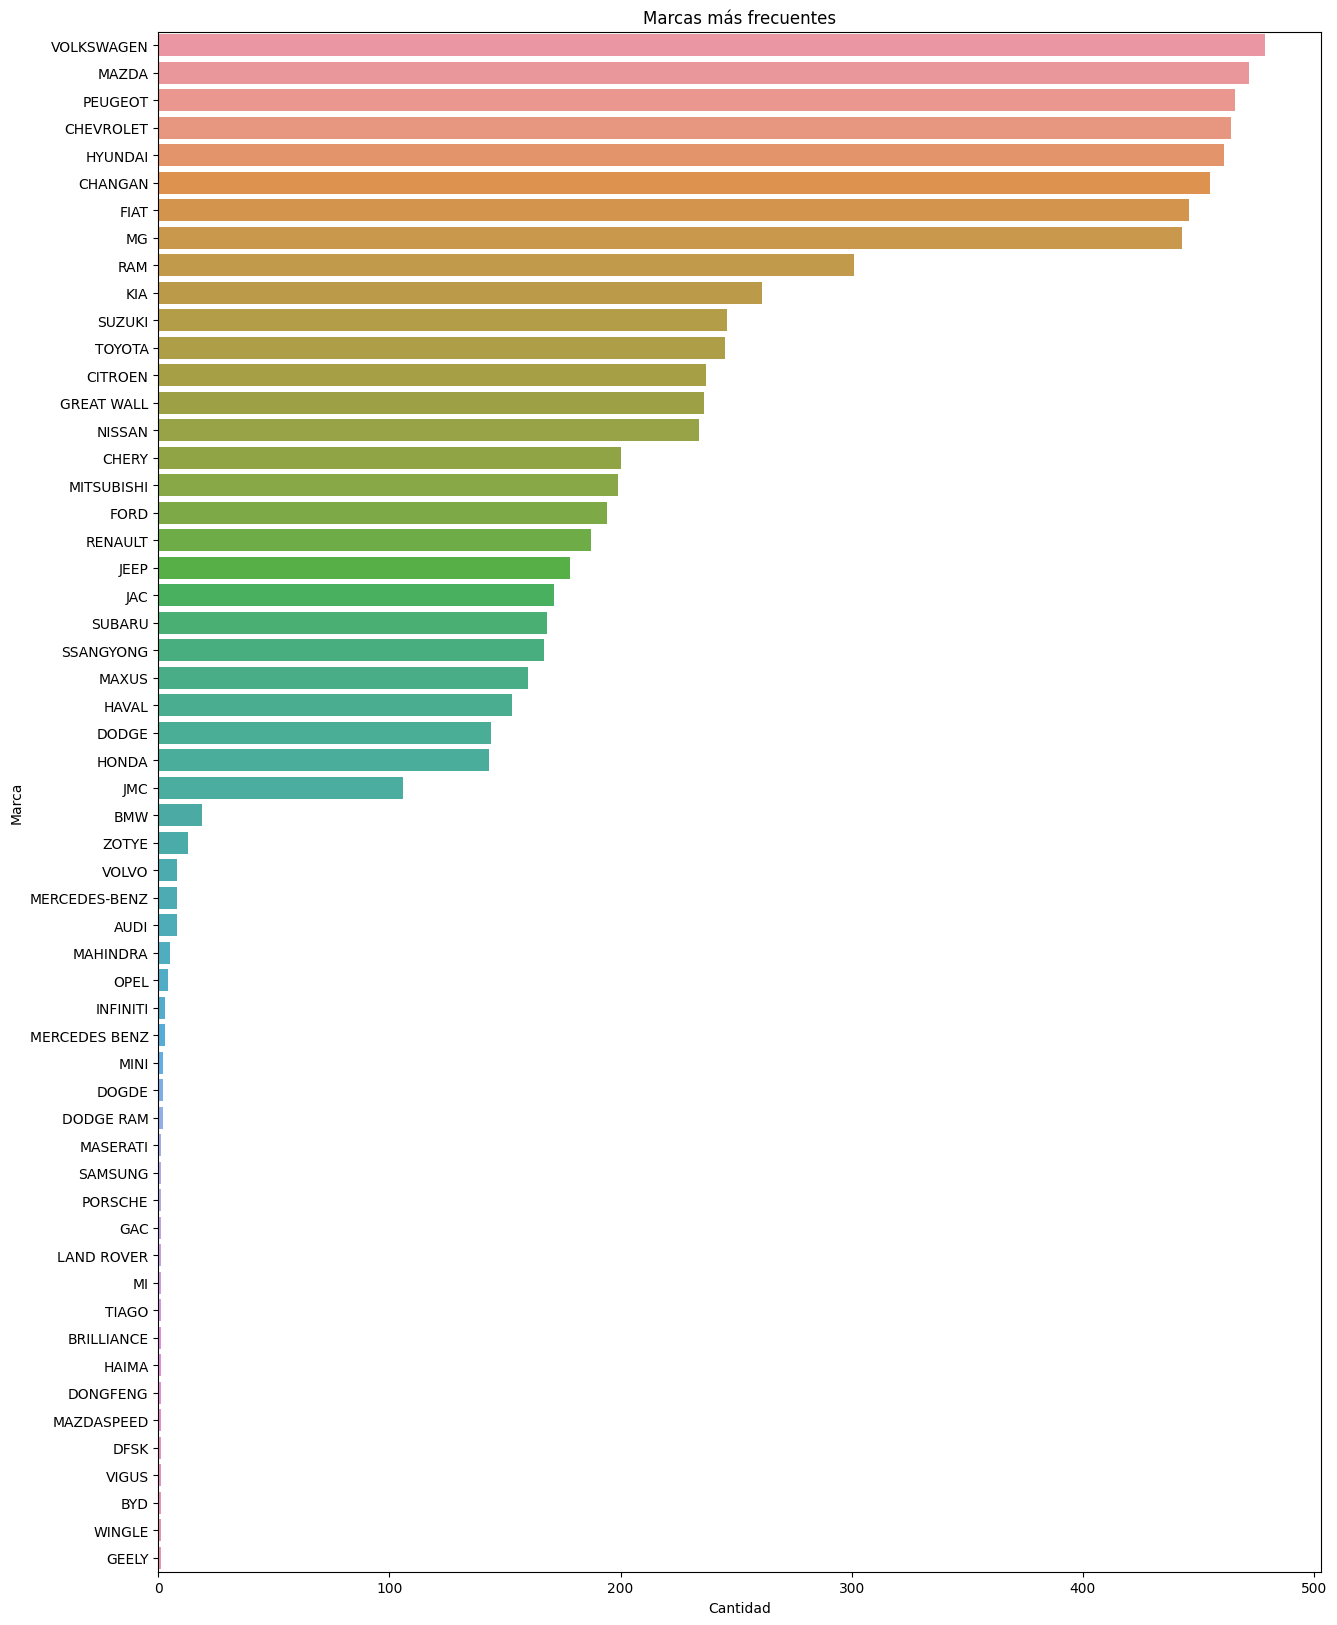

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# generate barplot for Marca_y
plt.figure(figsize=(15, 20))
sns.countplot(y=df_merged['Marca_y'], order=df_merged['Marca_y'].value_counts().index)
plt.title('Marcas más frecuentes')
plt.xlabel('Cantidad')
plt.ylabel('Marca')
plt.show()

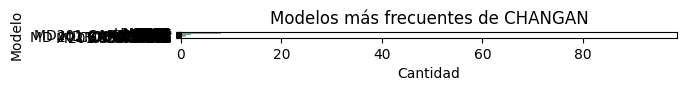

In [72]:
# generate barplot para cada modelo de cada marca
marcas = df_merged['Marca_y'].unique()

for i, marca in enumerate(marcas):
	df_marca = df_merged[df_merged['Marca_y'] == marca]
	plt.subplot(len(marcas), 1, i + 1)
	sns.countplot(y=df_marca['Modelo_y'], order=df_marca['Modelo_y'].value_counts().index)
	plt.title(f'Modelos más frecuentes de {marca}')
	plt.xlabel('Cantidad')
	plt.ylabel('Modelo')
	break

In [81]:
df_merged['Comuna'], df_merged['Region'] = df_merged['location'].str.split(', ', 1).str
df_merged.sample(5)

C:\Users\alniquia\AppData\Local\Temp\ipykernel_18328\4144393181.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_merged['Comuna'], df_merged['Region'] = df_merged['location'].str.split(', ', 1).str
C:\Users\alniquia\AppData\Local\Temp\ipykernel_18328\4144393181.py:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df_merged['Comuna'], df_merged['Region'] = df_merged['location'].str.split(', ', 1).str


,title,descr,price,year,km,transmission,location,date_posted,link,date_imported,Marca_x,Tipo,Modelo_x,Marca_y,Modelo_y,Comuna,Region
3792,Kia Frontier 2013,"Kia Frontier año 2013, 2.5 diesel, 1 cabina, c...",9100000.0,2013,252000.0,Manual,"Huechuraba, Región Metropolitana",02 oct 2023 a las 16:58,https://www.yapo.cl/vehiculos/kia-frontier-201...,2023-10-04 13:17:34.881391,KIA,Hatchback,MORNING,KIA,FRONTIER,Huechuraba,Región Metropolitana
6683,Subaru xv 2014,Compra tu auto 100% online. Despachos dentro d...,9490000.0,2014,195000.0,Automático,"Las Condes, Región Metropolitana",29 sep 2023 a las 07:54,https://www.yapo.cl/vehiculos/subaru-xv-2014_8...,2023-10-04 12:11:41.486238,SUBARU,SUV,FORESTER,SUBARU,XV,Las Condes,Región Metropolitana
3747,Kia morning 2022,KIA MORNING,9490000.0,2022,18299.0,Manual,"Lo Barnechea, Región Metropolitana",Ayer a las 13:27,https://www.yapo.cl/vehiculos/kia-morning-2022...,2023-10-04 13:15:55.025573,KIA,Hatchback,MORNING,KIA,MORNING,Lo Barnechea,Región Metropolitana
2617,Honda CRV,Vendo Honda CRV Version Touring Tope de Línea ...,28990000.0,2022,35000.0,Automático,"Puente Alto, Región Metropolitana",28 sep 2023 a las 15:11,https://www.yapo.cl/vehiculos/honda-crv_88270951,2023-10-04 12:23:59.749368,HONDA,SUV,HR-V,HONDA,CRV,Puente Alto,Región Metropolitana
221,Changan turbo elite cs35,Top de linea camara 360 techo panoramico. Turb...,12000000.0,2021,38000.0,Automático,"La Serena, IV Coquimbo",30 ago 2023 a las 11:05,https://www.yapo.cl/vehiculos/changan-turbo-el...,2023-10-04 03:15:51.633311,CHANGAN,SUV,ALSVIN,CHANGAN,CS35,La Serena,IV Coquimbo


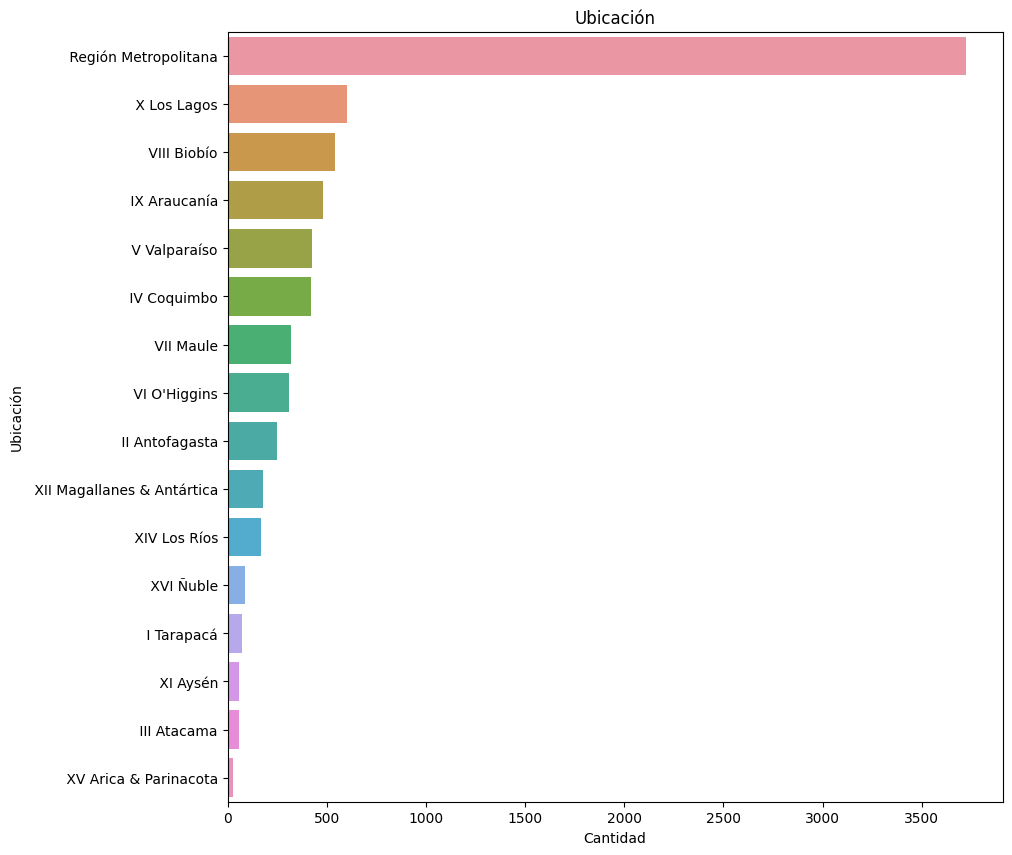

In [78]:
# location barplot
plt.figure(figsize=(10, 10))
sns.countplot(y=df_merged['Region'], order=df_merged['Region'].value_counts().index)
plt.title('Ubicación')
plt.xlabel('Cantidad')
plt.ylabel('Ubicación')
plt.show()

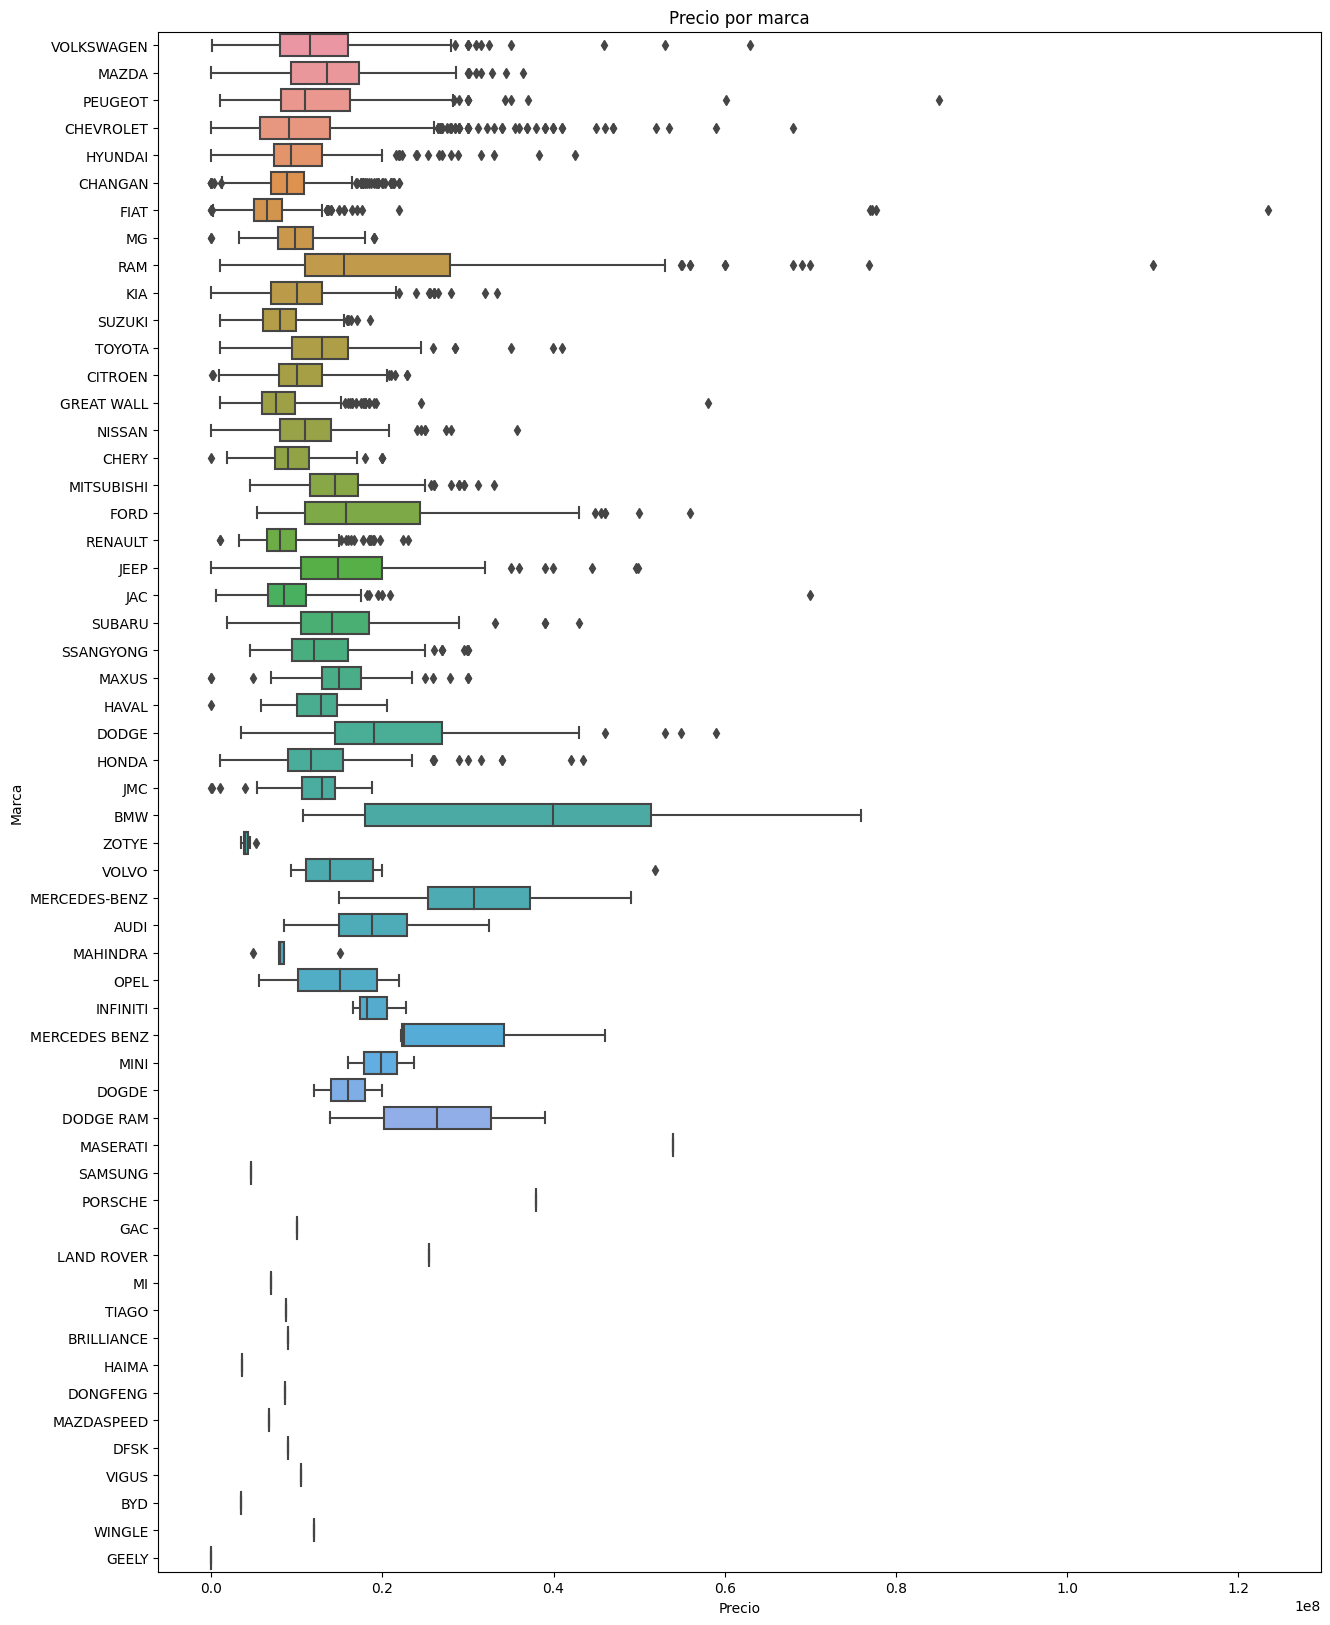

In [84]:
# subset price
df_merged = df_merged[df_merged['price'] < 200_000_000]

# boxplot price by marca

plt.figure(figsize=(15, 20))
sns.boxplot(x=df_merged['price'], y=df_merged['Marca_y'], order=df_merged['Marca_y'].value_counts().index)
plt.title('Precio por marca')
plt.xlabel('Precio')
plt.ylabel('Marca')
plt.show()

In [101]:
df_merged['year'] = df_merged['year'].astype('int')

In [96]:
df_merged = df_merged[df_merged['price'] > 1_000_000]

In [106]:

marcas_a_eliminar = [
	'MINI',
	'DOGDE',
	'DODGE RAM',
	'SAMSUNG',
	'MASERATI',
	'PORSCHE',
	'LAND ROVER',
	'GAC',
	'MI',
	'MAZDASPEED',
	'BRILLIANCE',
	'HAIMA',
	'DONGFENG',
	'TIAGO',
	'WINGLE',
	'DFSK',
	'VIGUS',
	'BYD',
	'GEELY',
]
# subset by marca
df_merged = df_merged[~df_merged['Marca_y'].isin(marcas_a_eliminar)]

In [103]:
df_merged = df_merged[df_merged['year'] > 2004]

In [109]:
# boxplot year vs price
plt.figure(figsize=(10, 5))
sns.catplot(x='year', y='price', data=df_merged, kind='strip', height=10, aspect=2, row='Marca_y', sharey=True)
plt.title('Precio vs Año')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()


<Figure size 1000x500 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

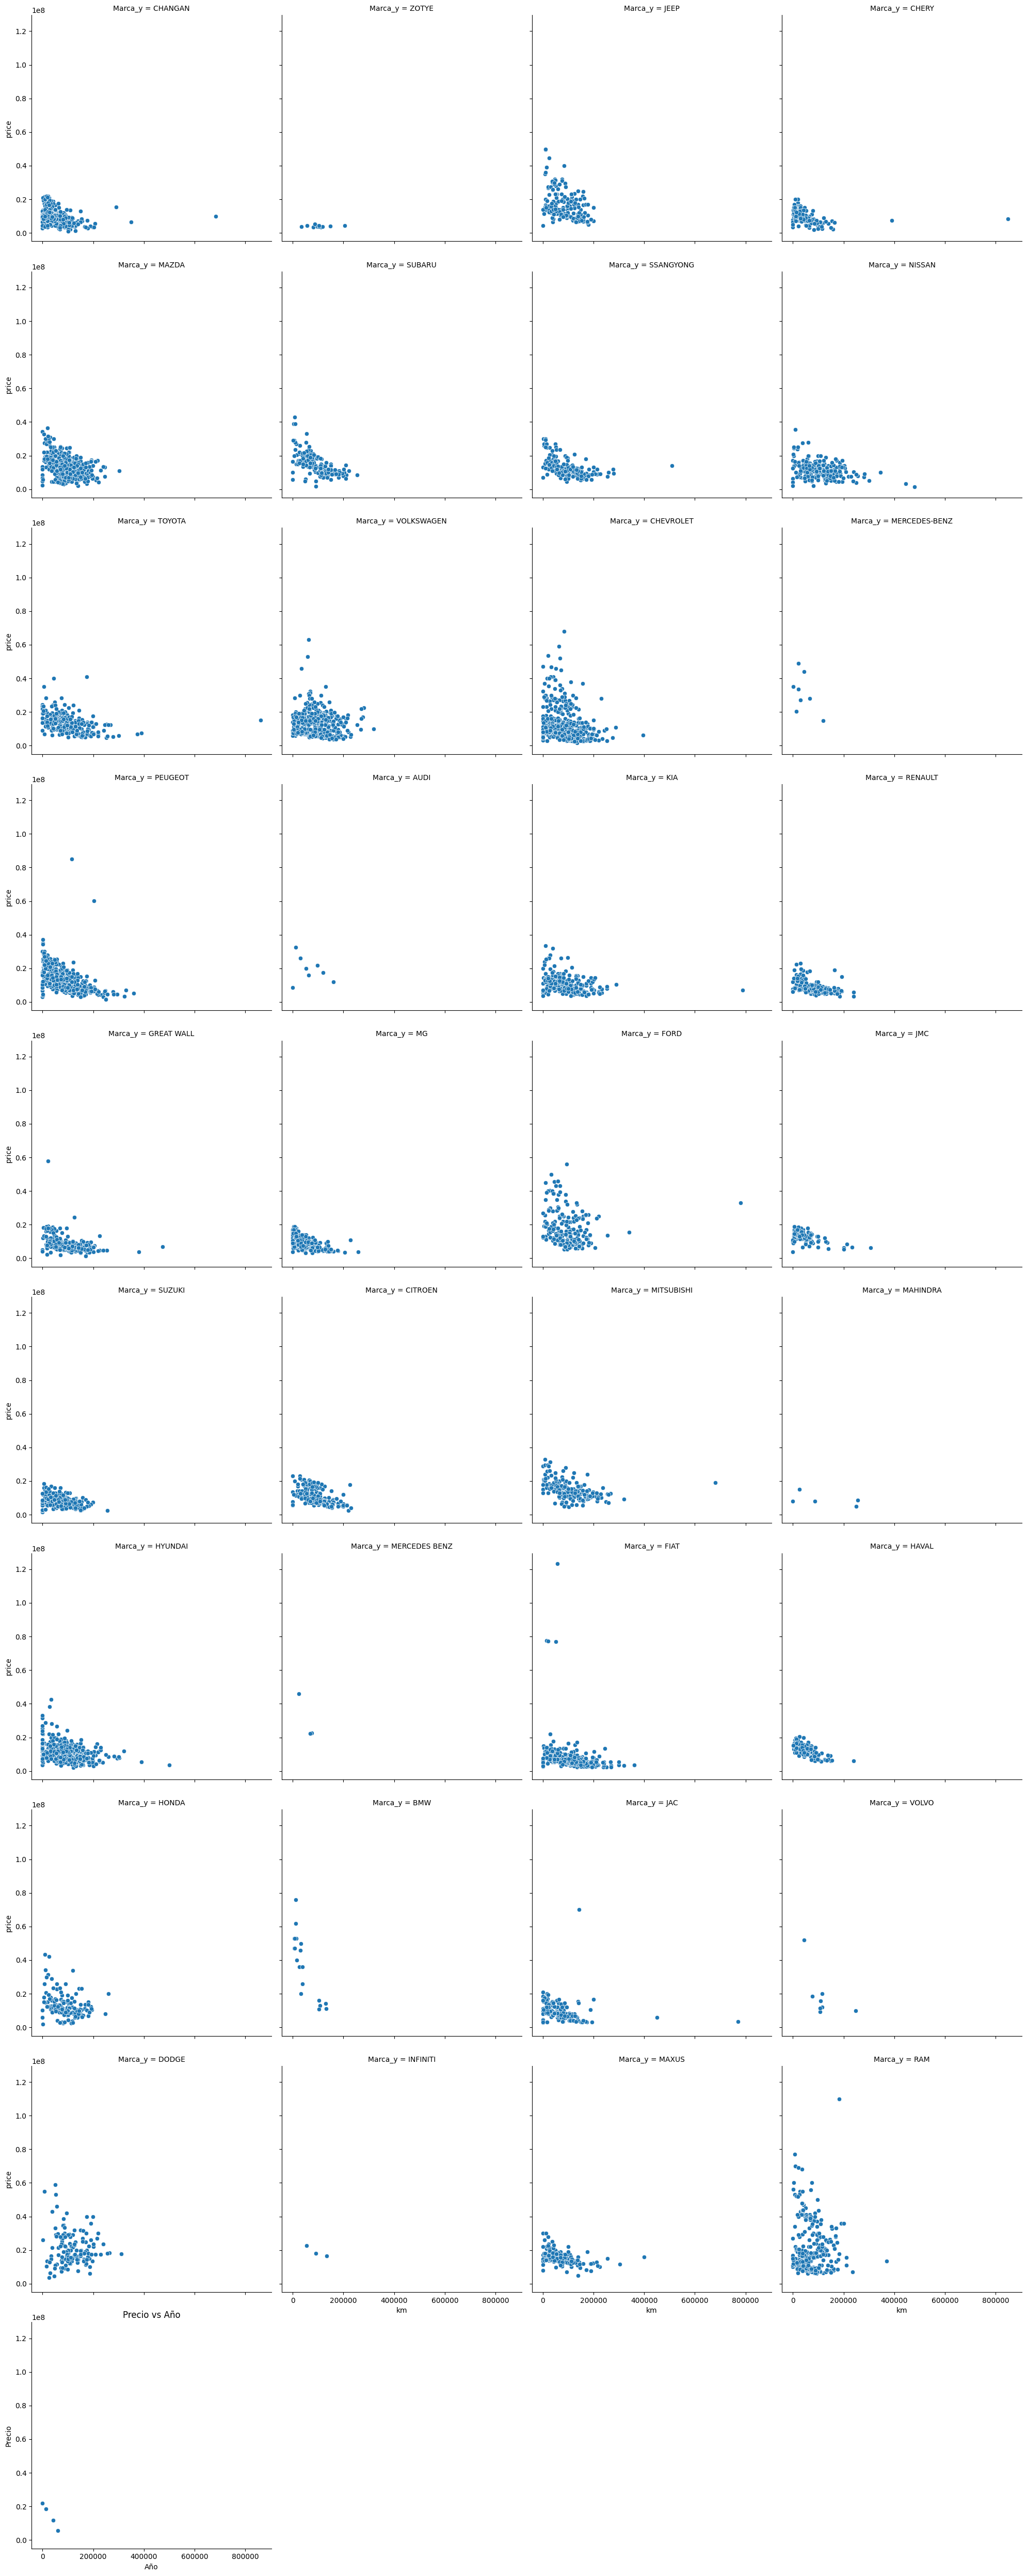

In [114]:
# scatterplot km vs price
plt.figure(figsize=(20, 20))
sns.relplot(x='km', y='price', data=df_merged, kind='scatter', col='Marca_y', col_wrap=4)
plt.title('Precio vs Año')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()


In [110]:
df_merged.to_csv('df_merged.csv', index=False)